## Baixando Utilitários

In [94]:
import numpy as np
import matplotlib.pyplot as plt

## Configurando Seed

In [95]:
seed : int = 42
np.random.seed(seed)

## Definindo Funções Utilitárias

In [96]:
def linear_function(X:np.ndarray) -> np.ndarray:
    return X @ np.random.randn(X.shape[1]) + np.random.randn(1)
def sigmoid(X:np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-X))
def step_function(X:np.ndarray)->np.ndarray:
    return (X >= 0.5).astype(np.int64)
def accuracy_fn(y_pred : np.ndarray, y_test : np.ndarray) -> np.ndarray:
    return np.sum(step_function(sigmoid(y_pred)) == y_test) / len(y_test)

## Obtendo Conjunto de Dados

In [97]:
n_samples : int = 100_000
n_dims : int = 2
X : np.ndarray = np.random.randn(n_samples, n_dims)
y = step_function(sigmoid(linear_function(X)))
data : np.ndarray = np.concatenate((X, y.reshape(-1, 1)), axis=1)

## Visualizando Dados

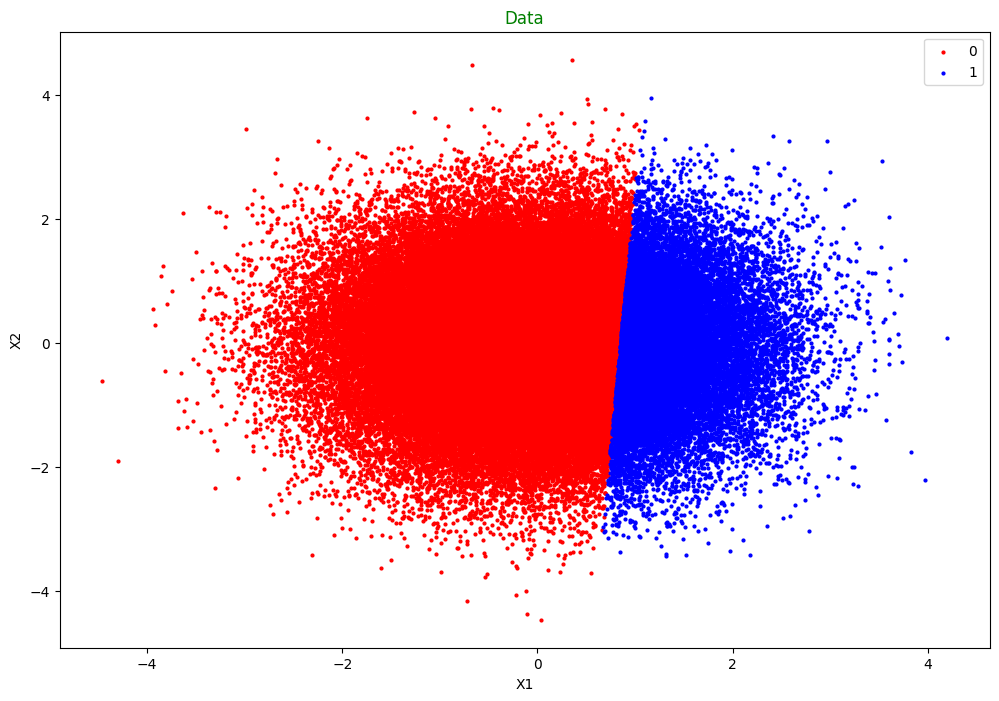

In [98]:
if n_dims == 2:
    plt.figure(figsize=(12, 8))
    plt.title("Data", fontsize=12, color="Green")
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=4, color="Red", label="0")
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=4, color="Blue", label="1")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()

## Realizando Shuffling dos Dados

In [99]:
np.random.shuffle(data)

## Obtendo Dados de Treino e Teste

In [100]:
X : np.ndarray = data[:,:2]

y : np.ndarray = data[:, 2:].reshape(-1)

train_part = int(len(X) * 0.8)

X_train, y_train = X[:train_part], y[:train_part]

X_test, y_test = X[train_part:], y[train_part:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 2), (80000,), (20000, 2), (20000,))

## Definindo Modelo de Regressão Logística

In [101]:
class LogisticRegression():
    def __init__(self, n_dims : int, epochs : int, lr : float = 1e-3) -> None:
        self.weights = np.random.randn(n_dims)
        self.bias = np.random.randn(1)
        self.epochs=epochs
        self.lr = lr
    def forward(self, X:np.ndarray) -> np.ndarray:
        return X @ self.weights + self.bias
    def train(self, X : np.ndarray, y) -> None:
        for epoch in range(self.epochs):
            train_loss = 0.0
            for i in range(X.shape[0]):
                y_pred : np.ndarray = self.forward(X[i])
                derivative_w = (sigmoid(y_pred) - y[i]) * X[i]
                derivative_b = (sigmoid(y_pred) - y[i])
                self.weights = self.weights - self.lr * derivative_w
                self.bias = self.bias - self.lr * derivative_b
            accuracy = accuracy_fn(model.forward(X), y)
            print(f"Epoch: {epoch} | Accuracy : {accuracy}")
    def parameters(self) -> list[float]:
        return [*self.weights, *self.bias]
    def __str__(self) -> str:
        return f"LogisticRegression(weights:{self.weights}, bias:{self.bias}, lr:{self.lr})"
    def __repr__(self) -> str:
        return f"LogisticRegression(weights:{self.weights}, bias:{self.bias}, lr:{self.lr})"

## Instanciando Modelo de Regressão Logística

In [102]:
model = LogisticRegression(X.shape[1], epochs=20, lr=1e-3)

model

LogisticRegression(weights:[-1.38863813 -0.48049109], bias:[-0.34751683], lr:0.001)

## Verificando Performance do Modelo Antes do Treino

In [103]:
accuracy = accuracy_fn(model.forward(X_test), y_test)

accuracy

np.float64(0.3889)

## Treinando Modelo

In [104]:
model.train(X_train, y_train)

Epoch: 0 | Accuracy : 0.9907
Epoch: 1 | Accuracy : 0.9948125
Epoch: 2 | Accuracy : 0.9963
Epoch: 3 | Accuracy : 0.997025
Epoch: 4 | Accuracy : 0.9976
Epoch: 5 | Accuracy : 0.9980375
Epoch: 6 | Accuracy : 0.9982875
Epoch: 7 | Accuracy : 0.99845
Epoch: 8 | Accuracy : 0.99865
Epoch: 9 | Accuracy : 0.9987625
Epoch: 10 | Accuracy : 0.9988
Epoch: 11 | Accuracy : 0.9988875
Epoch: 12 | Accuracy : 0.9989625
Epoch: 13 | Accuracy : 0.9990875
Epoch: 14 | Accuracy : 0.9991375
Epoch: 15 | Accuracy : 0.9992
Epoch: 16 | Accuracy : 0.999275
Epoch: 17 | Accuracy : 0.9992875
Epoch: 18 | Accuracy : 0.9993125
Epoch: 19 | Accuracy : 0.99935


## Verificando Parâmetros do Modelo Após o Treino

In [105]:
model.parameters()

[np.float64(10.685232456229091),
 np.float64(-0.6544714433258301),
 np.float64(-9.124459270329533)]

## Verificando Performance do Modelo Após o Treino

In [106]:
accuracy = accuracy_fn(model.forward(X_test), y_test)

accuracy

np.float64(0.99935)